In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

starbucks = pd.read_csv('./data/reviews_data.csv')
starbucks[810:-1]
starbucks.shape

(850, 6)

In [29]:
starbucks.dtypes

name            object
location        object
Date            object
Rating         float64
Review          object
Image_Links     object
dtype: object

In [30]:
starbucks.loc[starbucks.duplicated()]

,name,location,Date,Rating,Review,Image_Links
819,Nikki,"Union City, CA","Reviewed Nov. 5, 2008",NaN,No Review Text,['No Images']


In [31]:
starbucks.describe()

,Rating
count,705.000000
mean,1.870922
std,1.397672
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


# search for any duplicates

In [32]:
duplicated_rows = starbucks.duplicated()
duplicated_rows

duplicates = starbucks[duplicated_rows]
duplicates

,name,location,Date,Rating,Review,Image_Links
819,Nikki,"Union City, CA","Reviewed Nov. 5, 2008",NaN,No Review Text,['No Images']


# Drop Duplitates

In [33]:
starbucks = starbucks.drop_duplicates(keep="first").reset_index(drop=True)
starbucks.head(9)
# starbucks.shape

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...
5,Alyssa,"Sunnyvale, TX","Reviewed Sept. 14, 2023",1.0,We had to correct them on our order 3 times. T...,['No Images']
6,ken,"Spring Hill, FL","Reviewed Sept. 8, 2023",1.0,I have tried Starbucks several different times...,['No Images']
7,Nikki,"Asheville, NC","Reviewed Aug. 25, 2023",1.0,Starbucks near me just launched new fall foods...,['No Images']
8,Alex,"Reisterstown, MD","Reviewed Aug. 5, 2023",1.0,"I ordered online for the Reisterstown Rd, St T...",['No Images']


# Rating Describe and Visualization

In [34]:
starbucks['Rating'].describe()

count    705.000000
mean       1.870922
std        1.397672
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: Rating, dtype: float64

In [35]:
starbucks[starbucks['Rating']==5]

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...
...,...,...,...,...,...,...
555,diane,"Greer, SC","Reviewed Nov. 22, 2014",5.0,Best crew ever at Wade Hampton Greer South Car...,['No Images']
569,June,"Jupiter, FL","Reviewed Sept. 24, 2014",5.0,I had two Starbucks accounts I wanted to combi...,['No Images']
640,Kim,"West New York, NJ","Reviewed Aug. 20, 2012",5.0,I have been a Starbucks customer for many year...,['No Images']
647,Gary,"Aberdeen, Other","Reviewed May 23, 2012",5.0,I traveled from Aberdeen to Elgin which is abo...,['No Images']


In [36]:
rating_counts = starbucks['Rating'].value_counts()
rating_counts 

Rating
1.0    451
2.0     99
5.0     83
4.0     39
3.0     33
Name: count, dtype: int64

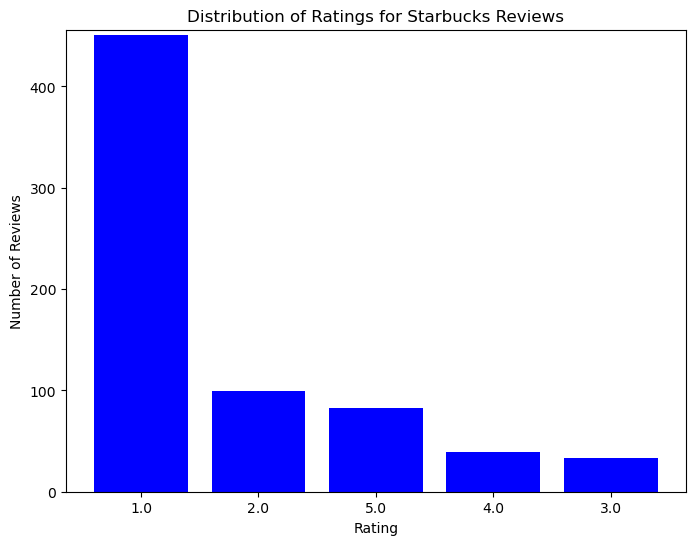

In [37]:
plt.figure(figsize=(8, 6))
plt.bar(rating_counts.index.astype(str), rating_counts.values, color='blue')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings for Starbucks Reviews')
plt.ylim(0, max(rating_counts.values) + 5)
plt.show()

# Images

In [38]:
starbucks['Image_Links'].unique()

array(["['No Images']",
       "['https://media.consumeraffairs.com/files/cache/reviews/starbucks_804950_thumbnail.jpg']",
       "['https://media.consumeraffairs.com/files/cache/reviews/starbucks_793785_thumbnail.jpeg', 'https://media.consumeraffairs.com/files/cache/reviews/starbucks_793787_thumbnail.jpg']",
       "['https://media.consumeraffairs.com/files/cache/reviews/starbucks_806740_thumbnail.jpg']",
       "['https://media.consumeraffairs.com/files/cache/reviews/starbucks_802790_thumbnail.jpg', 'https://media.consumeraffairs.com/files/cache/reviews/starbucks_802791_thumbnail.jpg']",
       "['https://media.consumeraffairs.com/files/cache/reviews/starbucks_801697_thumbnail.jpeg']",
       "['https://media.consumeraffairs.com/files/cache/reviews/starbucks_800135_thumbnail.jpg']",
       "['https://media.consumeraffairs.com/files/cache/reviews/starbucks_796930_thumbnail.jpg']",
       "['https://media.consumeraffairs.com/files/cache/reviews/starbucks_795081_thumbnail.jpg']",
      

In [39]:
def analyze_image(image):
    if str(image) == "['No Images']":
        return 0 
    else:
        return 1

starbucks["Image_Links"] =  starbucks["Image_Links"].apply(analyze_image)

In [40]:
starbucks

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,0
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,0
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,1
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,0
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,1
...,...,...,...,...,...,...
844,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,0
845,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text,0
846,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",0
847,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text,0


In [41]:
rate_image_rows = starbucks.groupby("Image_Links")['Rating'].value_counts()
rate_image_rows

Image_Links  Rating
0            1.0       414
             2.0        98
             5.0        79
             4.0        36
             3.0        32
1            1.0        37
             5.0         4
             4.0         3
             2.0         1
             3.0         1
Name: count, dtype: int64

In [42]:
starbucks['Image_Links'].value_counts()

Image_Links
0    803
1     46
Name: count, dtype: int64

Text(0, 0.5, 'Number of Reviews')

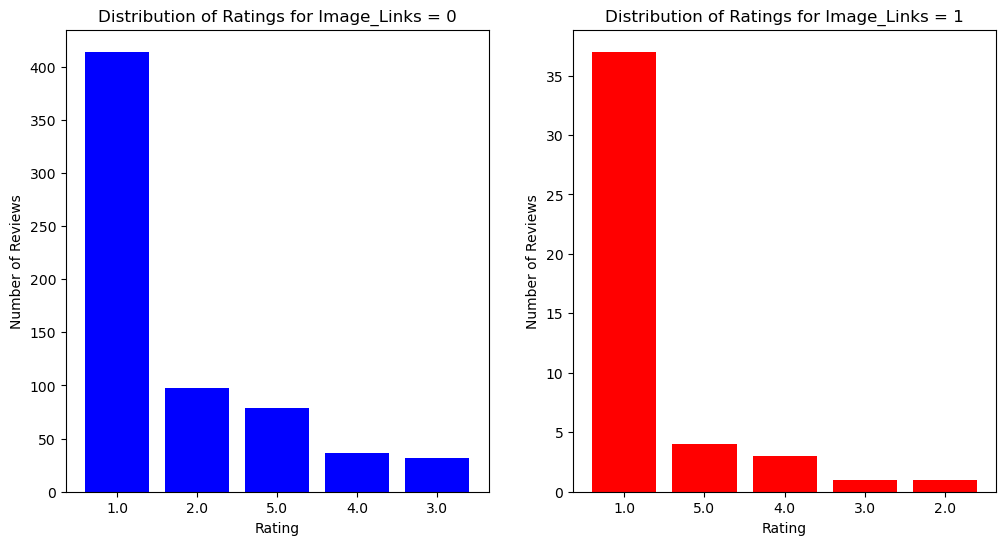

In [43]:
images_0 = starbucks[starbucks['Image_Links'] == 0]
images_1 = starbucks[starbucks['Image_Links'] == 1]

# Κατασκευάστε τα δύο bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart για Image_Links == 0
rating_counts_0 = images_0['Rating'].value_counts()
axes[0].bar(rating_counts_0.index.astype(str), rating_counts_0.values, color='blue')
axes[0].set_title('Distribution of Ratings for Image_Links = 0')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Number of Reviews')

# Bar chart για Image_Links == 1
rating_counts_1 = images_1['Rating'].value_counts()
axes[1].bar(rating_counts_1.index.astype(str), rating_counts_1.values, color='red')
axes[1].set_title('Distribution of Ratings for Image_Links = 1')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Number of Reviews')


# Date Analyze

In [44]:
def year_date(year):
    if year != None:
        return year.split(",")[1].strip()
    else:
        print("cant do that!!!!!!!")

starbucks["Date"] =  starbucks["Date"].apply(year_date)
starbucks


,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX",2023,5.0,Amber and LaDonna at the Starbucks on Southwes...,0
1,Courtney,"Apopka, FL",2023,5.0,** at the Starbucks by the fire station on 436...,0
2,Daynelle,"Cranberry Twp, PA",2023,5.0,I just wanted to go out of my way to recognize...,1
3,Taylor,"Seattle, WA",2023,5.0,Me and my friend were at Starbucks and my card...,0
4,Tenessa,"Gresham, OR",2023,5.0,I’m on this kick of drinking 5 cups of warm wa...,1
...,...,...,...,...,...,...
844,Becky,"Agoura Hills, CA",2006,NaN,I ordered two venti frappacino's without whipp...,0
845,Bob,"Goodrich, MI",2005,NaN,No Review Text,0
846,Erik,"Valley Village, CA",2004,NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",0
847,Andrew,"Fallbrook, CA",2004,NaN,No Review Text,0


In [45]:
date_count = starbucks['Date'].value_counts().sort_index()
date_count

Date
2000      1
2004      2
2005      1
2006      2
2007      3
2008     31
2009     52
2010     48
2011     26
2012     52
2013     24
2014     64
2015     90
2016     60
2017    124
2018     55
2019     55
2020     32
2021     34
2022     54
2023     39
Name: count, dtype: int64

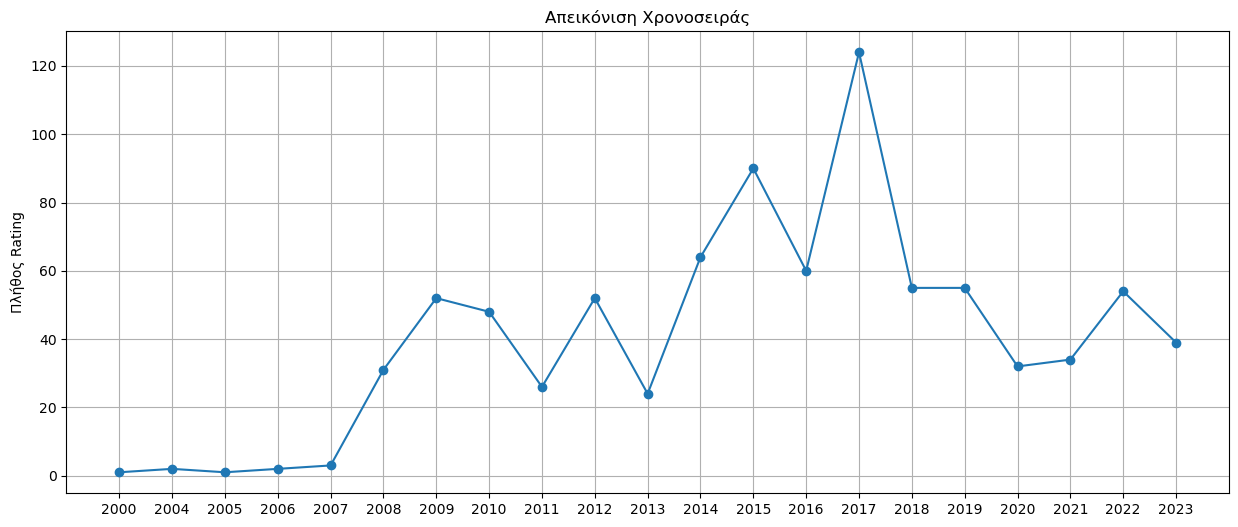

In [46]:

plt.figure(figsize=(15, 6))
plt.plot(date_count.index, date_count.values, marker='o', linestyle='-')
plt.title('Απεικόνιση Χρονοσειράς')
plt.ylabel('Πλήθος Rating')
plt.grid(True)
plt.show()


In [47]:
grouped_dates = starbucks.groupby("Date")["Rating"].agg('mean')
grouped_dates

Date
2000         NaN
2004         NaN
2005         NaN
2006         NaN
2007         NaN
2008         NaN
2009         NaN
2010    5.000000
2011    1.238095
2012    1.653846
2013    1.375000
2014    1.437500
2015    1.455556
2016    1.716667
2017    3.064516
2018    1.963636
2019    1.618182
2020    1.593750
2021    1.558824
2022    1.796296
2023    1.666667
Name: Rating, dtype: float64

In [48]:
mini_df = grouped_dates[8:]
mini_df

Date
2011    1.238095
2012    1.653846
2013    1.375000
2014    1.437500
2015    1.455556
2016    1.716667
2017    3.064516
2018    1.963636
2019    1.618182
2020    1.593750
2021    1.558824
2022    1.796296
2023    1.666667
Name: Rating, dtype: float64

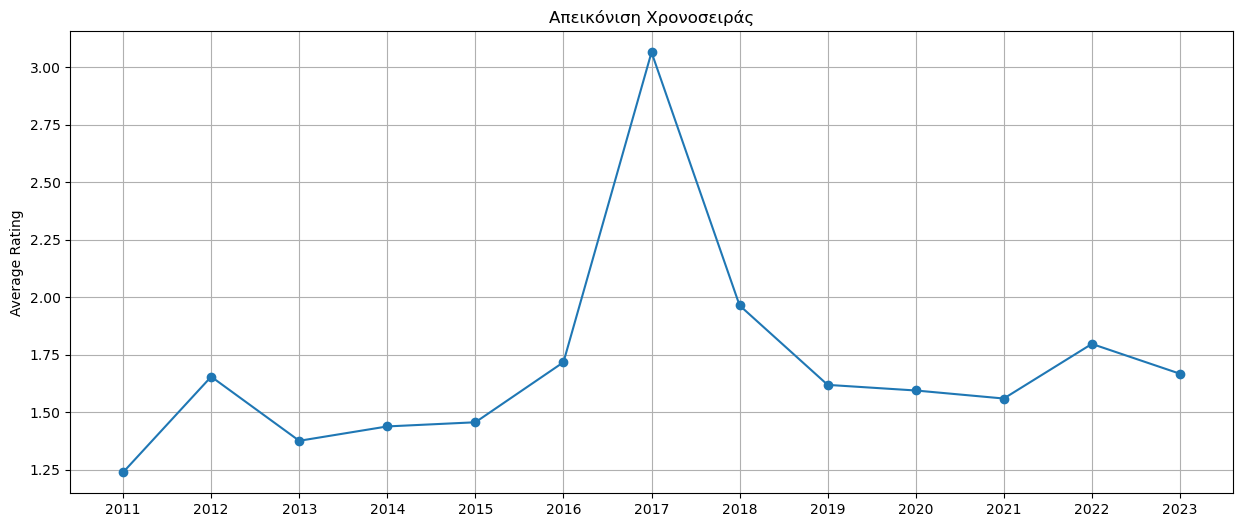

In [49]:
plt.figure(figsize=(15, 6))
plt.plot(mini_df.index, mini_df.values, marker='o', linestyle='-')
plt.title('Απεικόνιση Χρονοσειράς')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

# Locations


In [50]:
def location_area(location_):
    if location_ is not None and len(location_.split(",")) > 1:
        return location_.split(",")[1].strip()
    else:
        print('cant do that!!!')
        
starbucks["location"] =  starbucks["location"].apply(location_area)
starbucks

cant do that!!!
cant do that!!!


,name,location,Date,Rating,Review,Image_Links
0,Helen,TX,2023,5.0,Amber and LaDonna at the Starbucks on Southwes...,0
1,Courtney,FL,2023,5.0,** at the Starbucks by the fire station on 436...,0
2,Daynelle,PA,2023,5.0,I just wanted to go out of my way to recognize...,1
3,Taylor,WA,2023,5.0,Me and my friend were at Starbucks and my card...,0
4,Tenessa,OR,2023,5.0,I’m on this kick of drinking 5 cups of warm wa...,1
...,...,...,...,...,...,...
844,Becky,CA,2006,NaN,I ordered two venti frappacino's without whipp...,0
845,Bob,MI,2005,NaN,No Review Text,0
846,Erik,CA,2004,NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",0
847,Andrew,CA,2004,NaN,No Review Text,0


In [51]:
locations = starbucks['location'].value_counts()
locations[:20]

location
CA       172
FL        46
TX        40
WA        38
Other     38
NY        37
IL        27
NC        27
GA        27
AZ        24
NJ        23
OR        20
CO        20
OH        19
PA        19
MA        17
VA        17
ON        13
NV        13
MO        12
Name: count, dtype: int64

In [52]:
california_rating = starbucks[starbucks["location"]=="CA"]["Rating"].value_counts()
california_rating

Rating
1.0    86
2.0    25
4.0    11
5.0     9
3.0     8
Name: count, dtype: int64

In [53]:
rating_perc = starbucks['Rating'].value_counts(normalize=True)
rating_perc

Rating
1.0    0.639716
2.0    0.140426
5.0    0.117730
4.0    0.055319
3.0    0.046809
Name: proportion, dtype: float64

In [54]:
new_datas = pd.read_csv('C:/Users/xrist/OneDrive/Υπολογιστής/data/Data-Science-Tutorials/data/reviews_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/xrist/OneDrive/Υπολογιστής/data/Data-Science-Tutorials/data/reviews_data.csv'

In [ ]:
new_datas["Rating"]=new_datas["Rating"].replace([1,2],2)
new_datas["Rating"]=new_datas["Rating"].replace(3,0)
new_datas["Rating"]=new_datas["Rating"].replace([4,5],1)
new_datas = new_datas.dropna(axis = 0, how ='any')
new_datas["Rating"]=new_datas["Rating"].astype(int)
new_datas

In [ ]:
new_datas["Rating"].value_counts()
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
plt.pie(new_datas["Rating"].value_counts(),labels=["Negative","Positive","Neural"], autopct='%1.1f%%',colors=['#66b3ff', '#99ff99', '#ffcc99'] , startangle=90);

In [ ]:
plt.figure(figsize=(9, 4))
plt.bar(rating_perc.index.astype(str), rating_perc.values, color='blue')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings by perc %')
plt.ylim(0, 1)
plt.show()

# Corr

In [ ]:
correlation_matrix = starbucks[['Image_Links', 'Rating']].corr()

# Εμφάνιση του πίνακα συσχέτισης
print(correlation_matrix)

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
image_rank = starbucks.groupby("Image_Links")['Rating'].value_counts(normalize=True)
image_rank

In [ ]:
image_rank = starbucks.groupby("Image_Links")['Rating'].value_counts(normalize=True).unstack()
image_rank

In [ ]:
image_rank = starbucks.groupby("Image_Links")['Rating'].value_counts(normalize=True).unstack()

# Δημιουργία του heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(image_rank, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Rating Distribution for each Image_Links Value')
plt.show()

In [ ]:
correlation_data = {
    'Image_Links': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    'Rating': [1.0, 2.0, 5.0, 4.0, 3.0, 1.0, 5.0, 4.0, 2.0, 3.0],
    'Correlation': [0.628225, 0.148710, 0.119879, 0.054628, 0.048558, 0.804348, 0.086957, 0.065217, 0.021739, 0.021739]
}

correlation_df = pd.DataFrame(correlation_data)

# Δημιουργία του heatmap
plt.figure(figsize=(10, 8))
heatmap_data = correlation_df.pivot(index='Image_Links', columns='Rating', values='Correlation')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap between Image_Links and Rating')
plt.show()

In [55]:
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import emoji

# nlp = spacy.load('en_core_web_sm')
import nltk

nltk.download('wordnet')
import string
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB



from sklearn.metrics import accuracy_score

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/iasonaschristoulakis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Cleaning Data

In [56]:
data = pd.read_csv("./data/reviews_data.csv")


In [57]:
data = data[["Review", "Rating"]]

In [58]:
def cleaning (text):
    text = re.sub('[^a-zA-Z]', ' ', str(text).lower().strip())
    text = re.sub('@[A-Za-z0-9_]+', '', text) 
    text = re.sub('#','',text) 
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    text = emoji.replace_emoji(text, replace='')
    return text

In [59]:
data["Review"] = data["Review"].apply(cleaning)

In [60]:
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK data (if not already downloaded)
nltk.download('punkt')

# Example usage of word_tokenize
text = "NLTK is a leading platform for building Python programs to work with human language data."
tokens = word_tokenize(text)
print(tokens)

['NLTK', 'is', 'a', 'leading', 'platform', 'for', 'building', 'Python', 'programs', 'to', 'work', 'with', 'human', 'language', 'data', '.']


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/iasonaschristoulakis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Lemmatization 
Lemmatization functions as a text preprocessing technique within the domain of natural language processing (NLP) models. Its primary objective is to break down words into their essential roots, making it easier to identify resemblances.

In [61]:
def lemm(data):
    wordnet = WordNetLemmatizer()
    lemmanized = []
    for i in range(len(data)):
        lemmed = []
        words = word_tokenize(data['Review'].iloc[i])
        for w in words:
            lemmed.append(wordnet.lemmatize(w))
        lemmanized.append(lemmed)

    data['lemmanized'] = lemmanized
    data['Review'] = data['lemmanized'].apply(' '.join)
    data=data.drop("lemmanized",axis=1)
    return data
data=lemm(data)

In [62]:
labels = data["Rating"]
training = data["Review"]


In [68]:
X_train, X_test, y_train, y_test = train_test_split(training, labels, test_size=0.2, random_state=42)

## Feature Extraction

In [69]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## Training Models

In [70]:
model= LogisticRegression(multi_class="multinomial")
model.fit(X_train_vec,y_train)
preds = model.predict(X_test_vec)
print(accuracy_score(y_test,preds))

ValueError: Input y contains NaN.

In [66]:
model = DecisionTreeClassifier()
model.fit(X_train_vec,y_train)
preds = model.predict(X_test_vec)
print(accuracy_score(y_test,preds))

ValueError: Input y contains NaN.

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_vec,y_train)
preds = model.predict(X_test_vec)
print(accuracy_score(y_test,preds))